(120, 98, 4)


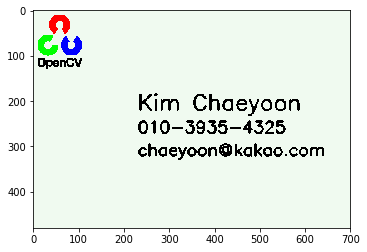

In [4]:
import cv2
import numpy as np


img_fg=cv2.imread('img/opencv_logo.png',cv2.IMREAD_UNCHANGED)
print(img_fg.shape)

#배경이미지 열기 
# img_bg = cv2.imread('img/girl.jpg')
img_bg = np.full((480, 700, 3), (240, 250, 240), np.uint8)
img_bg = cv2.putText(img_bg, 'Kim Chaeyoon', (230, 220), cv2.FONT_ITALIC, 1.6, (0, 0, 0), thickness=4)
img_bg = cv2.putText(img_bg, '010-3935-4325', (230, 270), cv2.FONT_ITALIC, 1.2, (0, 0, 0), thickness=4)
img_bg = cv2.putText(img_bg, 'chaeyoon@kakao.com', (230, 320), cv2.FONT_ITALIC, 1.2, (0, 0, 0), thickness=4)

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3],1,255,cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg=cv2.cvtColor(img_fg,cv2.COLOR_BGRA2BGR)
h, w =img_fg.shape[:2]
roi = img_bg[10:10+h,10:10+w]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg,img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi,roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg+masked_bg
img_bg[10:10+h,10:10+w] = added

plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()